# GRIP : The Sparks Foundation
### Data Science and Bussiness Analytics Intern

#### Author : Arshi Fatima

#### Task 1 : Prediction Using Supervised Machine Learning (Simple Linear Regression)
In this task we have to predict the Percentage Scores of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and target value is the percentage of Scores. This can be solved by using Simple Linear Regression.

Dataset - http://bit.ly/w-data

### Importing libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading data from URL

In [4]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10).T

Data imported successfully


,0,1,2,3,4,5,6,7,8,9
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7
Scores,21.0,47.0,27.0,75.0,30.0,20.0,88.0,60.0,81.0,25.0


### Exploratory Data Analysis

In [7]:
s_data.shape

(25, 2)

In [8]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Univariate Analysis

<AxesSubplot:xlabel='Hours', ylabel='Density'>

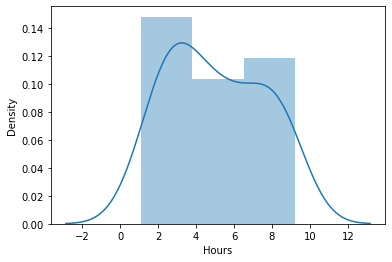

In [14]:
sns.distplot(s_data['Hours']) # Distritution of Hours variable

<AxesSubplot:xlabel='Scores', ylabel='Density'>

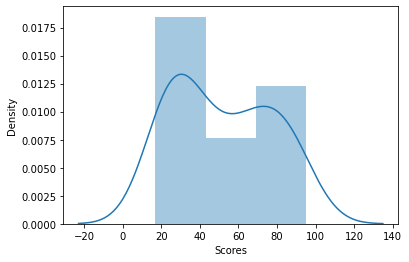

In [13]:
sns.distplot(s_data['Scores']) # Distritution of Scores

Distribution plot shows the variables are in perticular range. There is no outliers present in data.

####  Bivariate Analysis

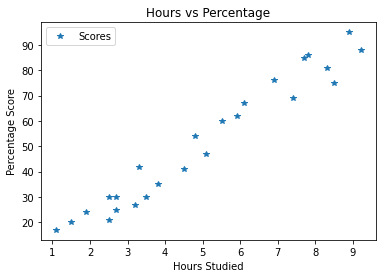

In [17]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a strong positive linear relation between the number of hours studied and percentage of score.**

In [11]:
s_data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Preparing the data**
Divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X = s_data.iloc[:, :-1].values  # Independent variable
y = s_data.iloc[:, 1].values  # Dependent Variable

Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression().fit(X_train, y_train) 

print("Training complete.")

Training complete.


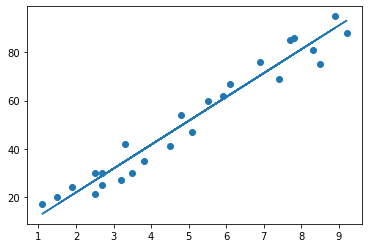

In [24]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [25]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What would be the predicted score if a students studies for 9.25 hours/day ?

In [28]:
hours = np.array(9.25)
own_pred = regressor.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred))  

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


From our Linear Regression model, if students study 9.25 hrs/day they will score "95.22" marks